<a href="https://colab.research.google.com/github/minhcong01/Baitap_AI/blob/main/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# BAI TAp TRAIN DATA MNIST
#thu vien
import tensorflow as tf
from keras import datasets, layers, models
from keras.models import Sequential, Model
from keras.layers import Dense,Activation,Dropout, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np

In [4]:
#tai du lieu
(X_train, y_train),(X_test,y_test)=datasets.mnist.load_data()

In [5]:
# dac diem cua tap du lieu
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


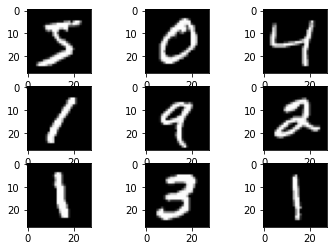

In [6]:
# Tao luoi anh 3x3
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()
X_train=X_train.astype ('float32')
X_test=X_test.astype ('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical (y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
#tao mo hinh va train
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test),verbose=1)
model.save('mnist_CNN.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
938/938 [==============================] - 17s 7ms/step - loss: 0.1377 - accuracy: 0.9584 - val_loss: 0.0541 - val_accuracy: 0.9813
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0318 - val_accuracy: 0.9896
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch

In [9]:
score=model.evaluate(X_test,y_test,verbose=0)
print('sai so kien tra la:',score[0])
print('Do chinh xac kiem tra:', score[1])

sai so kien tra la: 0.03334006294608116
Do chinh xac kiem tra: 0.9907000064849854


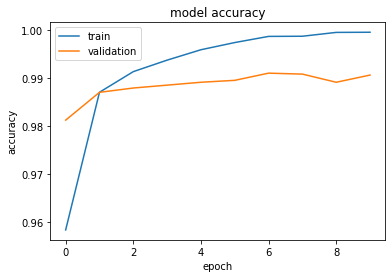

In [10]:
#do thi kq train
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [18]:
from google.colab import files
img = files.upload()

Saving so2.jpg to so2 (1).jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


SỐ: 2


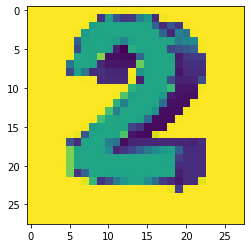

In [19]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('mnist_CNN.h5')
img = load_img('so2.jpg',grayscale=True, target_size = (28, 28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['0','1', '2', '3', '4', '5','6' ,'7', '8', '9']
print('SỐ:',a[pred])